**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**DOWNLOADING THE MNIST DATASET AND LOADING IT**

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root='./dataset',
                              train = True ,
                               transform = transform,
                               download = True)

test_dataset = datasets.MNIST(root='./dataset',
                              train = False ,
                              transform = transform,
                              download = True)

Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

**VISUALIZING SOME IMAGES**

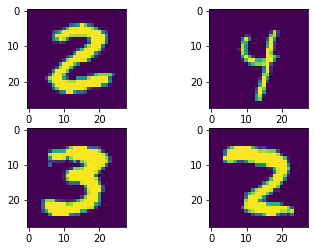

In [ ]:
f,a = plt.subplots(2,2)

img = np.array(train_dataset[25][0])
img = img.reshape((28,28))
a[0,0].imshow(img)

img = np.array(train_dataset[26][0])
img = img.reshape((28,28))
a[0,1].imshow(img)

img = np.array(train_dataset[27][0])
img = img.reshape((28,28))
a[1,0].imshow(img)

img = np.array(train_dataset[28][0])
img = img.reshape((28,28))
a[1,1].imshow(img)

**BUILDING THE MODEL**

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3,stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(8)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(in_features=1568, out_features=600)
        self.droput = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(in_features=600, out_features=10)
    def forward(self,x):
        out = self.cnn1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.cnn2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(-1,1568)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.droput(out)
        out = self.fc2(out)
        return out

In [ ]:
model = CNN()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
CUDA = torch.cuda.is_available()
if CUDA:
  model = model.cuda()

**TRAINING THE MODEL**

In [ ]:
epochs = 50
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
  correct = 0
  iterations = 0
  iter = 0.0

  for batch , (images,labels) in enumerate(train_loader):

    if CUDA:
      images = images.cuda()
      labels = labels.cuda()

    outputs = model(images)

    loss = loss_function(outputs,labels)
    iter = iter + loss.item()

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
    _,pred = torch.max(outputs,1)
    correct = correct + (labels==pred).sum().item()

    iterations +=1
  print('-----------EPOCH '+str(epoch+1)+'------------')
  train_loss.append(iter/iterations)
  train_acc.append(correct/len(train_dataset))
  print('TRAINING LOSS = ' + str(train_loss[epoch]))
  print('TRAINING ACCURACY = ' + str(train_acc[epoch]))

  correct = 0
  iter = 0.0
  iterations = 0

  for batch , (images,labels) in enumerate(test_loader):
    if CUDA:
      images = images.cuda()
      labels = labels.cuda()

    outputs = model(images)

    _,pred = torch.max(outputs,1)
    correct = correct + (labels==pred).sum().item()
    loss = loss_function(outputs,labels)
    iter = iter + loss.item()
    iterations += 1

  test_loss.append(iter/iterations)
  test_acc.append(correct/len(test_dataset))
  print('TEST LOSS = ' + str(test_loss[epoch]))
  print('TESTING ACCURACY = ' + str(test_acc[epoch]))
  print('------------------------------------')


-----------EPOCH 1------------
TRAINING LOSS = 0.03773403216754862
TRAINING ACCURACY = 0.9877
TEST LOSS = 0.044489275170490145
TESTING ACCURACY = 0.9864
------------------------------------
-----------EPOCH 2------------
TRAINING LOSS = 0.03149851648049662
TRAINING ACCURACY = 0.9893
TEST LOSS = 0.03636432586528827
TESTING ACCURACY = 0.9879
------------------------------------
-----------EPOCH 3------------
TRAINING LOSS = 0.027108346000604796
TRAINING ACCURACY = 0.9915666666666667
TEST LOSS = 0.04135726084117777
TESTING ACCURACY = 0.9865
------------------------------------
-----------EPOCH 4------------
TRAINING LOSS = 0.02352444375731769
TRAINING ACCURACY = 0.9924
TEST LOSS = 0.03867308839573525
TESTING ACCURACY = 0.9877
------------------------------------
-----------EPOCH 5------------
TRAINING LOSS = 0.019059745932299848
TRAINING ACCURACY = 0.9935666666666667
TEST LOSS = 0.03894146756036207
TESTING ACCURACY = 0.9865
------------------------------------
-----------EPOCH 6----------

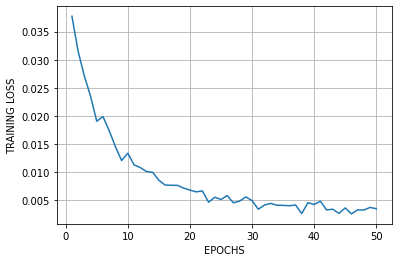

In [ ]:
plt.plot(range(1,epochs+1),train_loss)
plt.xlabel('EPOCHS')
plt.ylabel('TRAINING LOSS')
plt.grid()
plt.show()

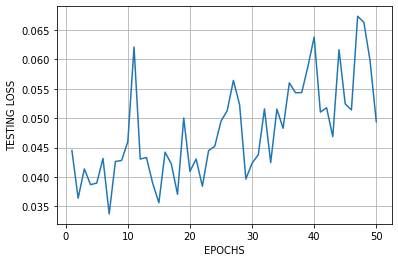

In [ ]:
plt.plot(range(1,epochs+1),test_loss)
plt.xlabel('EPOCHS')
plt.ylabel('TESTING LOSS')
plt.grid()
plt.show()

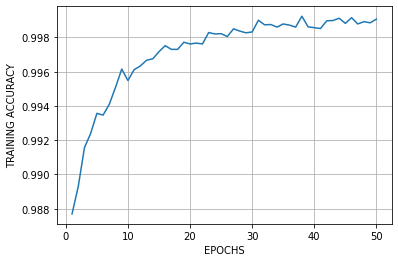

In [ ]:
plt.plot(range(1,epochs+1),train_acc)
plt.xlabel('EPOCHS')
plt.ylabel('TRAINING ACCURACY')
plt.grid()
plt.show()

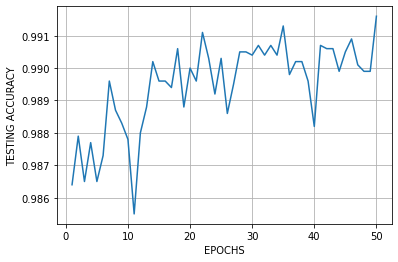

In [ ]:
plt.plot(range(1,epochs+1),test_acc)
plt.xlabel('EPOCHS')
plt.ylabel('TESTING ACCURACY')
plt.grid()
plt.show()